<a href="https://colab.research.google.com/github/JMML2021/Sprint-8.-Algoritmes-d-aprenentatge-NO-supervisat-Agrupaci-/blob/main/Sprint_8_Algoritmes_d%E2%80%99aprenentatge_NO_supervisat_Agrupaci%C3%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline


from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
 

In [2]:
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Activo Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Abro el fichero
 
path = ('/content/drive/MyDrive/01_COLAB/Publicacions Facebook Thailandia.csv')

    
df=  pd.read_csv(path, sep=',', encoding="latin-1")
df.shape

nRow, nCol = df.shape
print(f'Hay  {nRow} filas con {nCol} columnas')
df1=df.copy()
print('\nImprimo el primer registro, solo para ver como es:\n')
df1.iloc[0]

Hay  7050 filas con 16 columnas

Imprimo el primer registro, solo para ver como es:



ï»¿status_id        246675545449582_1649696485147474
status_type                                    video
status_published                      4/22/2018 6:00
num_reactions                                    529
num_comments                                     512
num_shares                                       262
num_likes                                        432
num_loves                                         92
num_wows                                           3
num_hahas                                          1
num_sads                                           1
num_angrys                                         0
Column1                                          NaN
Column2                                          NaN
Column3                                          NaN
Column4                                          NaN
Name: 0, dtype: object

In [5]:
df1.head()

,ï»¿status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [6]:
#Check data with info function
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ï»¿status_id      7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [7]:
# Search for missing, NA and null values)


(df1.isnull() | df1.empty | df1.isna()).sum()

ï»¿status_id           0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [8]:
df1.columns

Index(['ï»¿status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys', 'Column1', 'Column2', 'Column3',
       'Column4'],
      dtype='object')

# Data analysis
Basic statistical analysis

In [9]:
#Let's show a summary of teh dataset where we can see 
# the basic statistic data.
df1.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,0.0,0.0,0.0,0.0
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,NaN,NaN,NaN,NaN
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,NaN,NaN,NaN,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1cacf51250>,
      dtype=object)

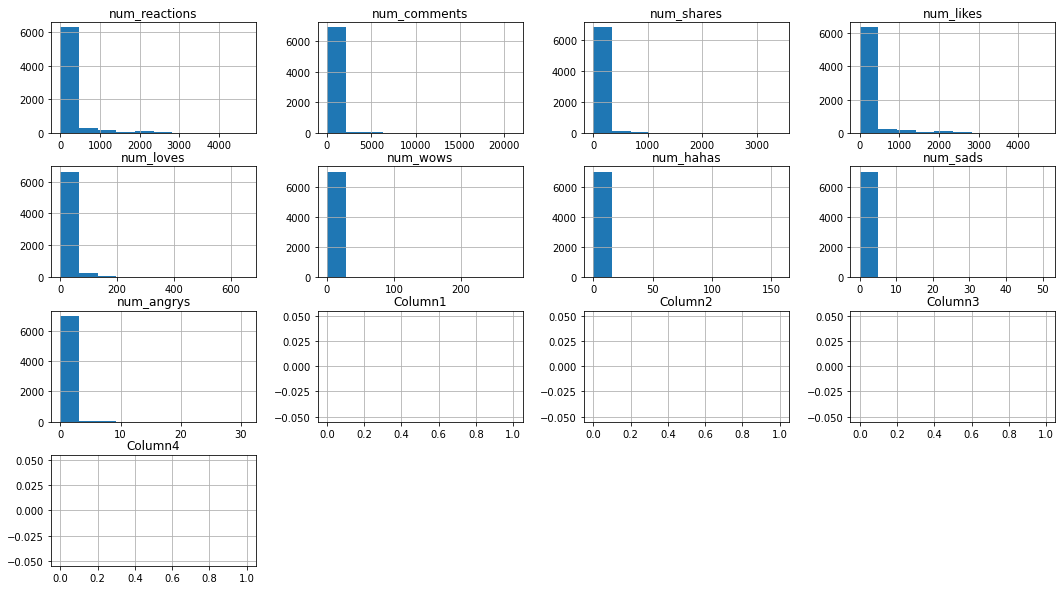

In [10]:
#Let's show the histograms of the variables alcohol, magnesium y color_intensity.
#Histogramas
 
df1[df1.columns].hist(figsize=(18,10))

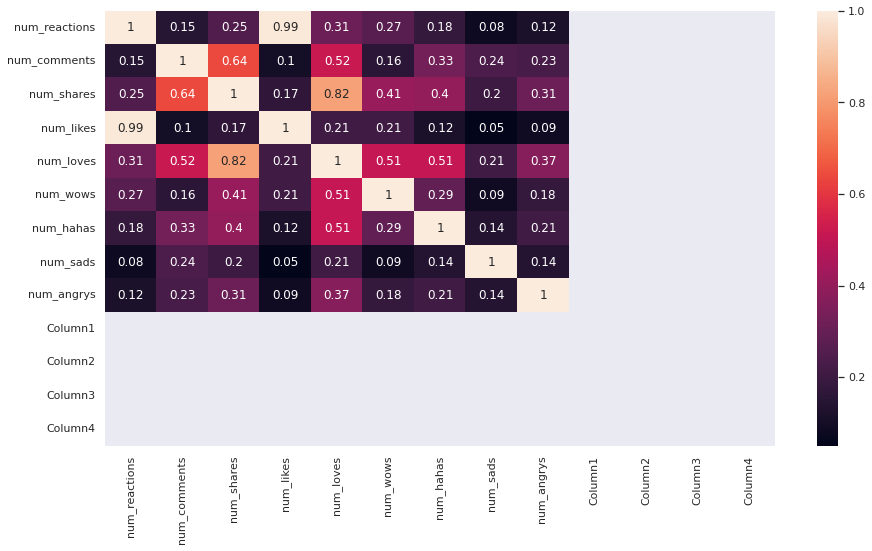

In [11]:
correlation_matrix = df1.corr().round(2)
# annot = True to print the values inside the square
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(data=correlation_matrix, annot=True)

https://colab.research.google.com/github/JMML2021/Sprint-7.-Algoritmes-d-aprenentatge-supervisat-Classificaci-/blob/main/Sprint_7_Algoritmes_d%E2%80%99aprenentatge_supervisat_Classificacio.ipynb#scrollTo=lzjdcUxTCQaG

Creacion de 4 nuevas  columnas:
year
month
day
hour

---



In [14]:
df1['status_published'] = pd.to_datetime(df1['status_published'])

df1['year'] = df1['status_published'].dt.year
df1['month'] = df1['status_published'].dt.month
df1['day'] = df1['status_published'].dt.day
df1['hour'] = df1['status_published'].dt.hour

df1 = df1.drop(['status_id'], axis=1) quito esta columna

# Exercici 1
Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant l'algorisme de K-means.

https://www.kaggle.com/code/bernardoaugusto/facebook-live-sellers

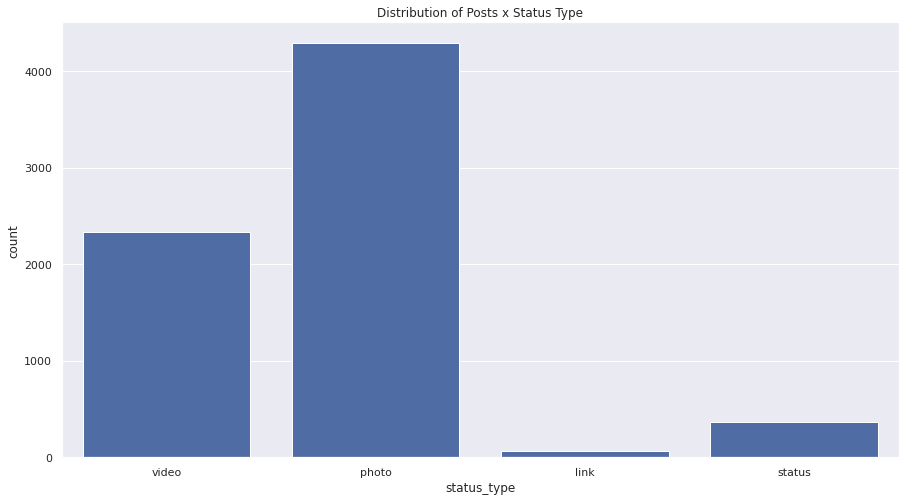

In [16]:
pal = ["#4267B2"]
pl = sns.countplot(x=df["status_type"], palette= pal)
pl.set_title("Distribution of Posts x Status Type")
plt.show()

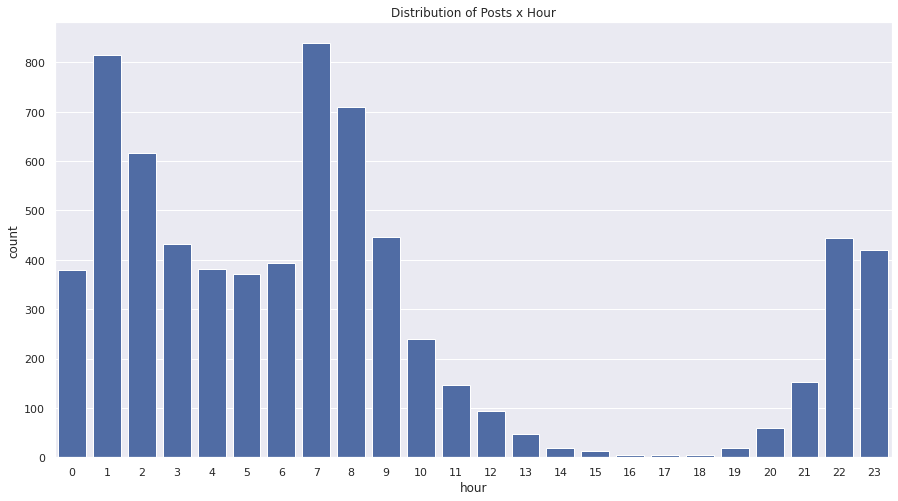

In [18]:
pal = ["#4267B2"]
pl = sns.countplot(x=df1["hour"], palette= pal)
pl.set_title("Distribution of Posts x Hour")
plt.show()

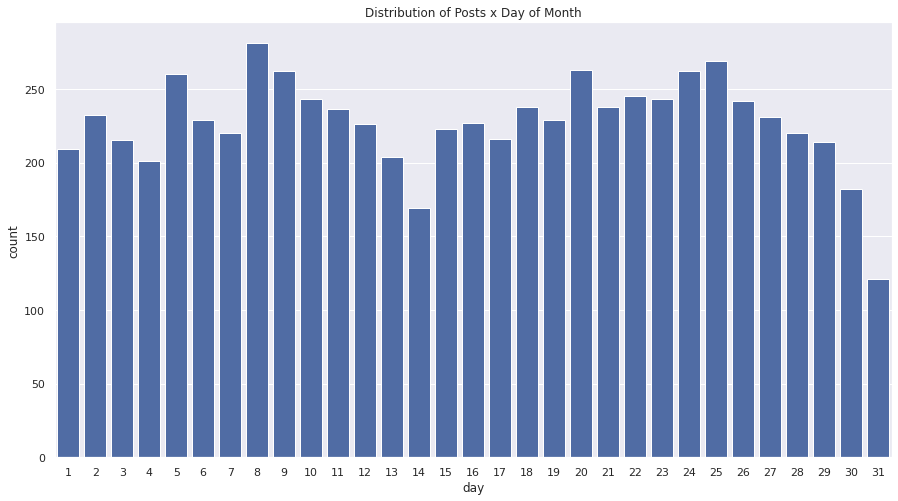

In [19]:
pal = ["#4267B2"]
pl = sns.countplot(x=df1["day"], palette= pal)
pl.set_title("Distribution of Posts x Day of Month")
plt.show()

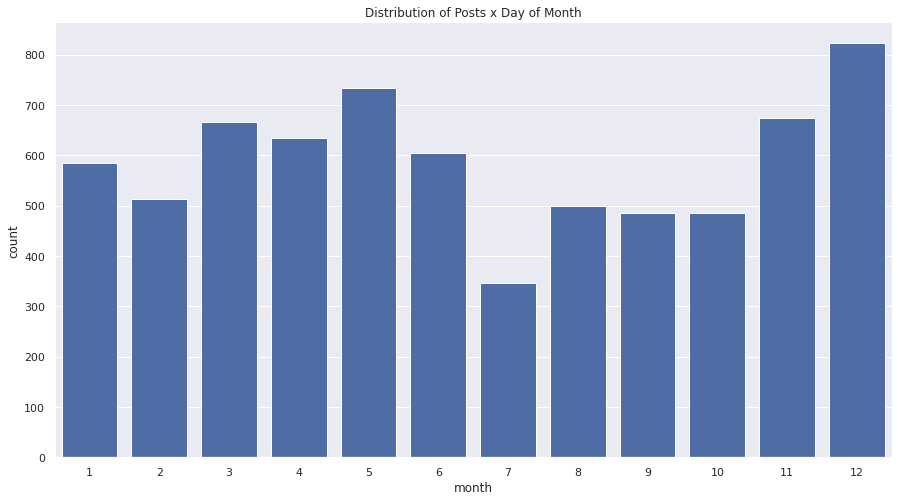

In [21]:
pal = ["#4267B2"]
pl = sns.countplot(x=df1["month"], palette= pal)
pl.set_title("Distribution of Posts x Day of Month")
plt.show()

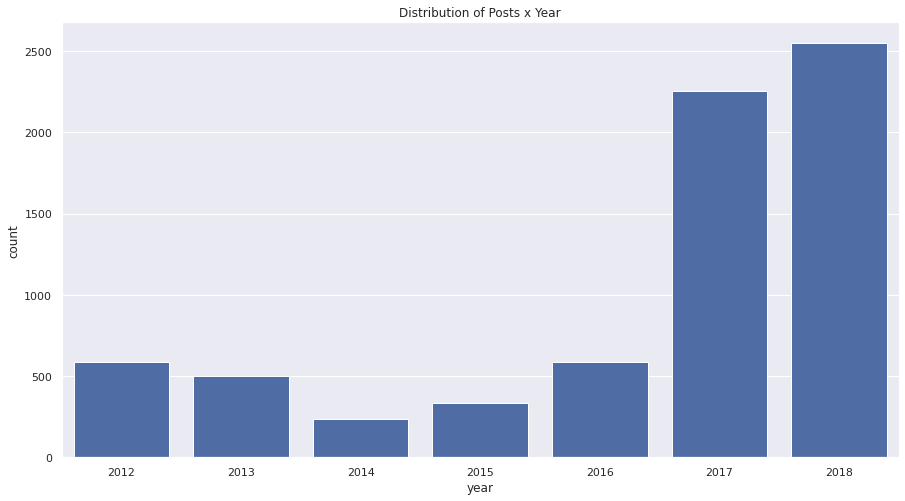

In [22]:
pal = ["#4267B2"]
pl = sns.countplot(x=df1["year"], palette= pal)
pl.set_title("Distribution of Posts x Year")
plt.show()

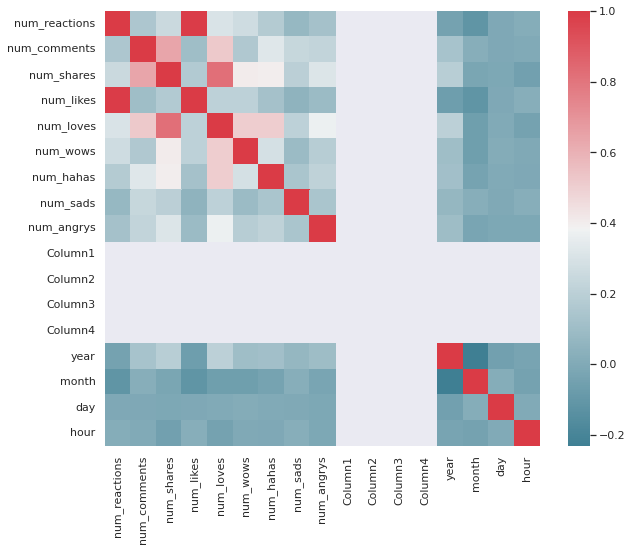

In [26]:
# heatmap to show the relational between features

import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(10, 8))
corr = df1.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [35]:
# Elimino las columnas vacias
df1= df1.drop(['Column1', 'Column2','Column3','Column4'], axis=1)

La correlacion esta en:
num_reactions
num_loves
year
num_comments

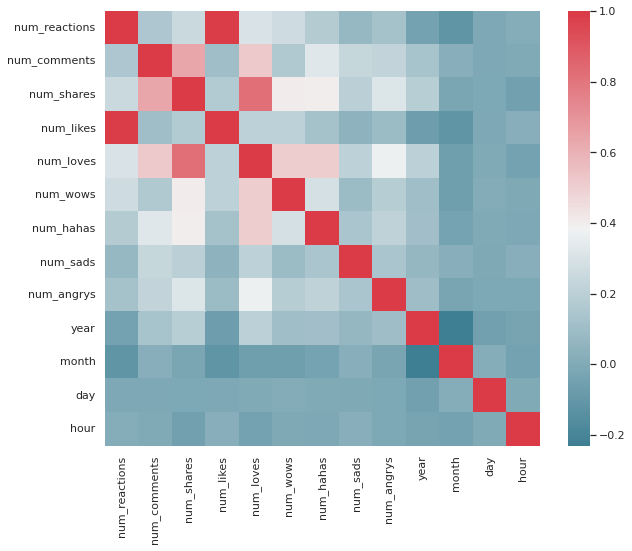

In [36]:
# heatmap to show the relational between features

import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(10, 8))
corr = df1.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [37]:
df1 = df1.drop(['num_reactions', 'num_loves', 'year', 'num_comments'], axis=1)

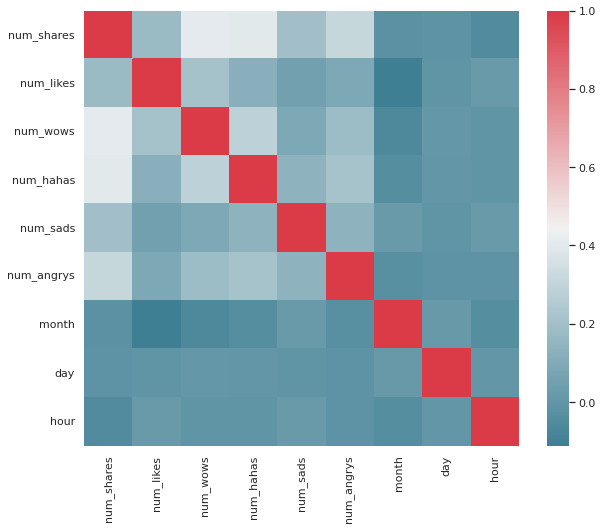

In [38]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(10, 8))
corr = df1.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [40]:
# k-means clustering
from sklearn.cluster import KMeans

clustering_kmeans = KMeans(n_clusters=2)
df['Clusters'] = clustering_kmeans.fit_predict(df)

ValueError: ignored